In [74]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas
from pandas.plotting import scatter_matrix

# matplotlib.pyplot fordata plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# from utilities import visualize_classifier

import numpy as np

import graphviz

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [50]:
names = ['sensor_1', 'sensor_2', 'direction']
dataset = pandas.read_csv('data\data_decision_trees.txt', names=names, sep=",", header=None)

In [51]:
dataset.shape

(360, 3)

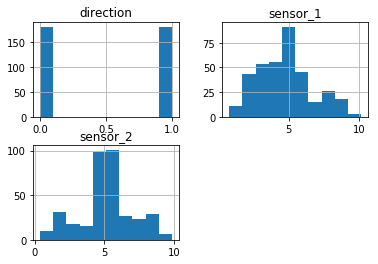

In [52]:
# Draw histograms
dataset.hist()
plt.show()

In [53]:
# Convert the dataset into array
array = dataset.values

# Create two (sub) arrays from it
# X - features, all rows, all columns but the last one
# y - labels, all rows, the last column
X, y = array[:, :-1], array[:, -1]

In [54]:
# Separate input data into classes based on labels
class0 = np.array(X[y==0])
class1 = np.array(X[y==1])
class2 = np.array(X[y==2])
class3 = np.array(X[y==3])
class4 = np.array(X[y==4])

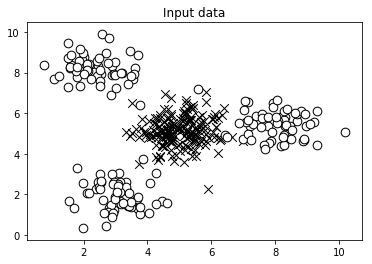

In [55]:
# Visualize input data
plt.figure()
plt.scatter(class0[:, 0], class0[:, 1], s=75, facecolors='black', edgecolors='black', linewidth=1, marker='x')
plt.scatter(class1[:, 0], class1[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')
plt.show()

In [64]:
# Split the dataset into into training and testing sets inproportion 8:2: 
#   80% of it as training data
#   20% as a validation dataset
set_prop = 0.3

#  Initialize seed parameter for the random number generator used for the split
seed = 7

# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [65]:
# Build Decision Trees Classifier 
params = {'max_depth': 3}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

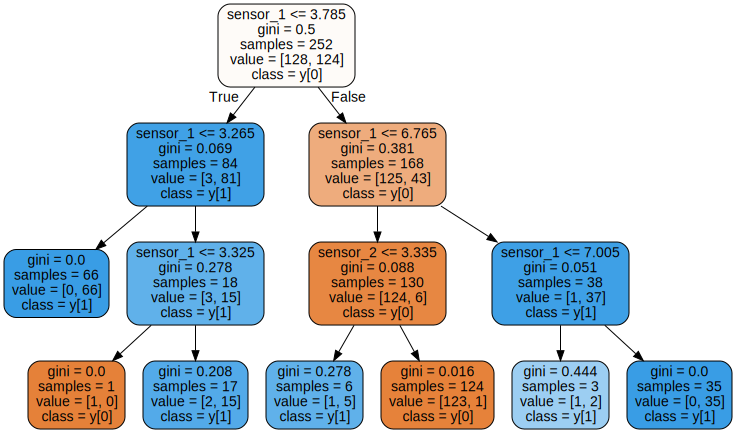

In [66]:
import graphviz
# draw tree from the trained data by graphviz package
dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=dataset.columns[:2],                         
                         class_names = True,        
                         filled=True, rounded=True,
                         proportion = False)  
graph = graphviz.Source(dot_data) 

# result saved in heart.pdf
graph.render("heart") 

# show it here
graph 

In [67]:
# Set the metrics
scoring = 'accuracy'

In [80]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9537037037037037

In [75]:
eclf = VotingClassifier([('classifier', classifier), ('rf', rf)])
eclf.fit (X_train, y_train)
eclf.score (X_test, y_test)

0.9629629629629629

In [78]:
# Predict the labels of test data
y_testp = classifier.predict(X_test)
 	
# Calculated accuracy of the model comparing the observed data and predicted data
print ("DecisionTreeClassifier accuracy is ", accuracy_score(y_test,y_testp)*100)

# Predict the labels of test data
y_testp = rf.predict(X_test)
 	
# Calculated accuracy of the model comparing the observed data and predicted data
print ("RandomForestClassifier accuracy is ", accuracy_score(y_test,y_testp)*100)

DecisionTreeClassifier accuracy is  93.51851851851852
RandomForestClassifier accuracy is  96.29629629629629
